[*********************100%***********************]  20 of 20 completed


c:\Users\naiti\AppData\Local\Programs\Python\Python310\lib\site-packages\scikit_learn-1.3.0-py3.10-win-amd64.egg\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Representative Stocks:
['TITAN.NS', 'BHARTIARTL.NS', 'HCLTECH.NS', 'BAJFINANCE.NS', 'ASIANPAINT.NS']


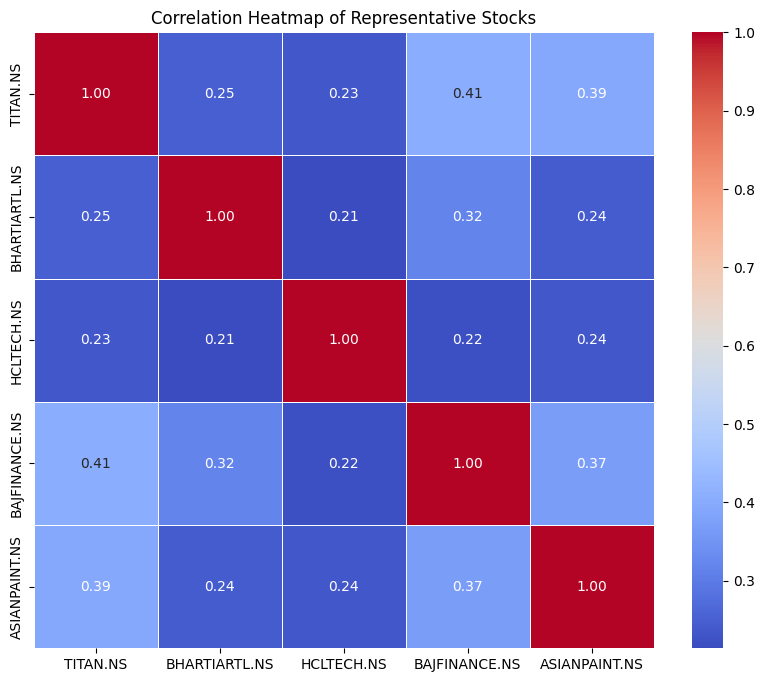

In [2]:
# Approach - use K-means clustering to make 5 groups of stocks which are internally 
# highly correlated, but each group is not correlated to the other. From each group,
# select a stock (with highest avg returns) to represent that group.

import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Replace the stock symbols with your desired symbols
stock_symbols = ['HDFCBANK.NS', 'RELIANCE.NS', 'ICICIBANK.NS', 'INFY.NS', 'ITC.NS', 'LT.NS',
                'TCS.NS', 'KOTAKBANK.NS', 'BHARTIARTL.NS', 'SBIN.NS', 'HINDUNILVR.NS',
                'BAJFINANCE.NS', 'ASIANPAINT.NS', 'MARUTI.NS', 'M&M.NS', 'TITAN.NS',
                'HCLTECH.NS', 'SUNPHARMA.NS', 'NTPC.NS', 'TATAMOTORS.NS']

# Download historical stock data
stock_data = yf.download(stock_symbols, start='2018-01-01', end='2023-11-01', group_by='ticker')

# Extract the 'Adj Close' prices by handling MultiIndex
adj_close_prices = stock_data.loc[:, (slice(None), 'Adj Close')]

# Flatten the MultiIndex columns
adj_close_prices.columns = adj_close_prices.columns.droplevel(1)

# Calculate daily returns
returns = adj_close_prices.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Use K-Means clustering to group stocks
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(correlation_matrix)

# Select one representative stock from each cluster
representative_stocks = []
for cluster_id in range(num_clusters):
    cluster_stocks = correlation_matrix.columns[cluster_assignments == cluster_id]
    representative_stocks.append(returns[cluster_stocks].mean().idxmax())

# Display the representative stocks
print("Representative Stocks:")
print(representative_stocks)

# Create a heatmap with enhanced visualization parameters
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.loc[representative_stocks, representative_stocks], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Representative Stocks')
plt.show()


In [3]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Approach - 

# Perform Regression Analysis:
# For each stock, perform a multiple linear regression with all other stocks as independent variables. 
# The coefficients from the regression model represent the relationships between the selected stock and 
# the other stocks.

# Select 5 Most Uncorrelated Stocks:
# Sum the absolute values of the regression coefficients for each stock and select the top 5 stocks 
# with the lowest sums as they are expected to be the most uncorrelated.


import yfinance as yf
import pandas as pd
import statsmodels.api as sm

# Replace the stock symbols with your desired symbols
stock_symbols = ['HDFCBANK.NS', 'RELIANCE.NS', 'ICICIBANK.NS', 'INFY.NS', 'ITC.NS', 'LT.NS',
                'TCS.NS', 'KOTAKBANK.NS', 'BHARTIARTL.NS', 'SBIN.NS', 'HINDUNILVR.NS',
                'BAJFINANCE.NS', 'ASIANPAINT.NS', 'MARUTI.NS', 'M&M.NS', 'TITAN.NS',
                'HCLTECH.NS', 'SUNPHARMA.NS', 'NTPC.NS', 'TATAMOTORS.NS']

# Download historical stock data
stock_data = yf.download(stock_symbols, start='2018-01-01', end='2023-11-01', group_by='ticker')

# Extract the 'Adj Close' prices by handling MultiIndex
adj_close_prices = stock_data.loc[:, (slice(None), 'Adj Close')]

# Flatten the MultiIndex columns
adj_close_prices.columns = adj_close_prices.columns.droplevel(1)

# Calculate daily returns
returns = adj_close_prices.pct_change().dropna()

# Function to perform regression analysis and return coefficients
def get_regression_coefficients(dep_stock, indep_stocks):
    X = returns[indep_stocks]
    X = sm.add_constant(X)  # Add a constant term
    y = returns[dep_stock]

    model = sm.OLS(y, X).fit()
    return model.params

# Select 5 most uncorrelated stocks
selected_stocks = []
for stock in stock_symbols:
    other_stocks = [s for s in stock_symbols if s != stock]
    coefficients = get_regression_coefficients(stock, other_stocks)
    selected_stocks.append((stock, coefficients.abs().sum()))

# Sort stocks based on the sum of absolute coefficients and select top 5
selected_stocks.sort(key=lambda x: x[1])
top_5_stocks = [stock[0] for stock in selected_stocks[:5]]

# Display the selected stocks
print("Selected Stocks:")
print(top_5_stocks)


[*********************100%***********************]  20 of 20 completed
Selected Stocks:
['BHARTIARTL.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TITAN.NS', 'ITC.NS']


[*********************100%***********************]  5 of 5 completed


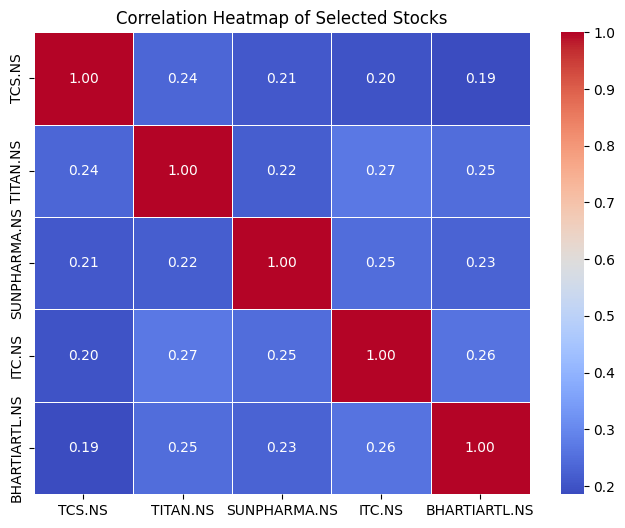

In [5]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace the stock symbols with the selected stocks
selected_stocks = ['BHARTIARTL.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TITAN.NS', 'ITC.NS']

# Download historical stock data
stock_data = yf.download(selected_stocks, start='2018-01-01', end='2023-11-01', group_by='ticker')

# Extract the 'Adj Close' prices by handling MultiIndex
adj_close_prices = stock_data.loc[:, (slice(None), 'Adj Close')]

# Flatten the MultiIndex columns
adj_close_prices.columns = adj_close_prices.columns.droplevel(1)

# Calculate daily returns
returns = adj_close_prices.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Stocks')
plt.show()


In [6]:
#Approach - PCA. Bad result.

import yfinance as yf
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Download historical stock data
stock_data = yf.download(stock_symbols, start='2018-01-01', end='2023-11-01', group_by='ticker')

# Extract the 'Adj Close' prices by handling MultiIndex
adj_close_prices = stock_data.loc[:, (slice(None), 'Adj Close')]

# Flatten the MultiIndex columns
adj_close_prices.columns = adj_close_prices.columns.droplevel(1)

# Calculate daily returns
returns = adj_close_prices.pct_change().dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(returns)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Select the top 5 principal components
top_components = principal_components[:, :5]

# Identify stocks with low loadings on the top components
loadings = pd.DataFrame(pca.components_[:5, :], columns=returns.columns)

# Display stocks with low loadings
uncorrelated_stocks = loadings.abs().sum(axis=0).sort_values().index[:5]
print("5 Most Uncorrelated Stocks:")
print(uncorrelated_stocks)


[*********************100%***********************]  20 of 20 completed
5 Most Uncorrelated Stocks:
Index(['RELIANCE.NS', 'LT.NS', 'BHARTIARTL.NS', 'BAJFINANCE.NS',
       'ICICIBANK.NS'],
      dtype='object')


[*********************100%***********************]  5 of 5 completed


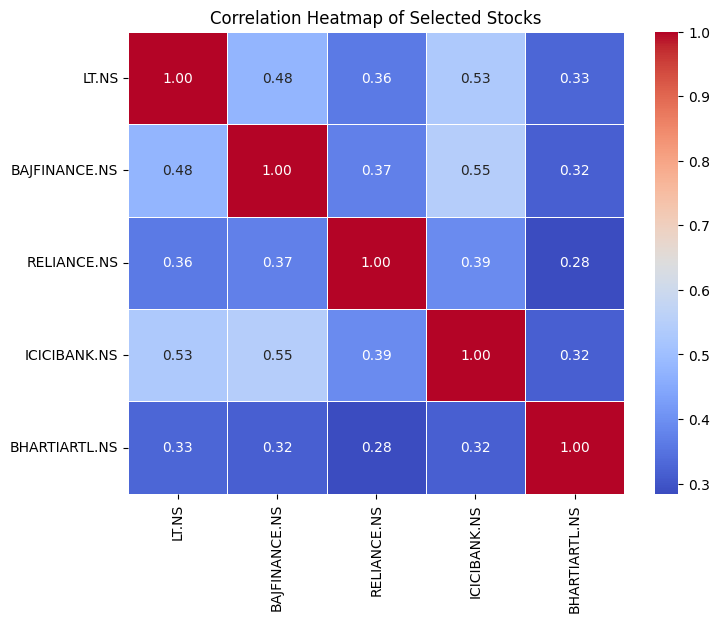

In [7]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace the stock symbols with the selected stocks
selected_stocks = ['RELIANCE.NS', 'LT.NS', 'BHARTIARTL.NS', 'BAJFINANCE.NS', 'ICICIBANK.NS']

# Download historical stock data
stock_data = yf.download(selected_stocks, start='2018-01-01', end='2023-11-01', group_by='ticker')

# Extract the 'Adj Close' prices by handling MultiIndex
adj_close_prices = stock_data.loc[:, (slice(None), 'Adj Close')]

# Flatten the MultiIndex columns
adj_close_prices.columns = adj_close_prices.columns.droplevel(1)

# Calculate daily returns
returns = adj_close_prices.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Stocks')
plt.show()


In [9]:
# Approach - Granger Causality [Bad result]
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Replace the stock symbols with your desired symbols
stock_symbols = ['HDFCBANK.NS', 'RELIANCE.NS', 'ICICIBANK.NS', 'INFY.NS', 'ITC.NS', 'LT.NS',
                'TCS.NS', 'KOTAKBANK.NS', 'BHARTIARTL.NS', 'SBIN.NS', 'HINDUNILVR.NS',
                'BAJFINANCE.NS', 'ASIANPAINT.NS', 'MARUTI.NS', 'M&M.NS', 'TITAN.NS',
                'HCLTECH.NS', 'SUNPHARMA.NS', 'NTPC.NS', 'TATAMOTORS.NS']

# Download historical stock data
stock_data = yf.download(stock_symbols, start='2018-01-01', end='2023-11-01', group_by='ticker')

# Extract the 'Adj Close' prices by handling MultiIndex
adj_close_prices = stock_data.loc[:, (slice(None), 'Adj Close')]

# Flatten the MultiIndex columns
adj_close_prices.columns = adj_close_prices.columns.droplevel(1)

# Calculate daily returns
returns = adj_close_prices.pct_change().dropna()

# Function to perform Granger causality test
def granger_causality_test(data, target, predictor, max_lag=5):
    test_result = grangercausalitytests(data[[target, predictor]], max_lag, verbose=False)
    p_value = test_result[max_lag][0]['ssr_ftest'][1]
    return p_value

# Perform pairwise Granger causality tests
granger_results = pd.DataFrame(index=stock_symbols, columns=stock_symbols)
for target_stock in stock_symbols:
    for predictor_stock in stock_symbols:
        if target_stock != predictor_stock:
            p_value = granger_causality_test(returns, target_stock, predictor_stock)
            granger_results.loc[target_stock, predictor_stock] = p_value

# Rank stocks based on Granger causality p-values
ranked_stocks = granger_results.mean(axis=1).sort_values(ascending=True).index

# Select the 5 stocks with weakest Granger causality
selected_stocks = ranked_stocks[:5]

# Display the selected stocks
print("Selected Stocks:")
print(selected_stocks)


[*********************100%***********************]  20 of 20 completed


c:\Users\naiti\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\naiti\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\naiti\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\naiti\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\naiti\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  

Selected Stocks:
Index(['RELIANCE.NS', 'LT.NS', 'MARUTI.NS', 'ITC.NS', 'NTPC.NS'], dtype='object')


c:\Users\naiti\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\naiti\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\naiti\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\naiti\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\naiti\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  

[*********************100%***********************]  5 of 5 completed


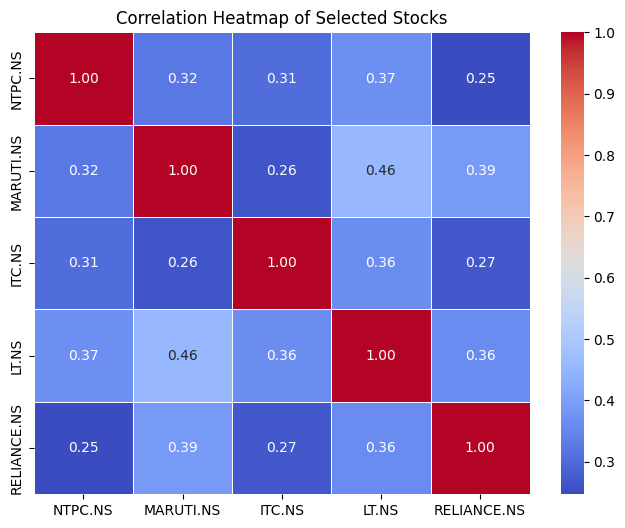

In [10]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace the stock symbols with the selected stocks
selected_stocks = ['RELIANCE.NS', 'LT.NS', 'MARUTI.NS', 'ITC.NS', 'NTPC.NS']

# Download historical stock data
stock_data = yf.download(selected_stocks, start='2018-01-01', end='2023-11-01', group_by='ticker')

# Extract the 'Adj Close' prices by handling MultiIndex
adj_close_prices = stock_data.loc[:, (slice(None), 'Adj Close')]

# Flatten the MultiIndex columns
adj_close_prices.columns = adj_close_prices.columns.droplevel(1)

# Calculate daily returns
returns = adj_close_prices.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Stocks')
plt.show()
